In [1]:
from pathlib import Path

import io

from IPython import display

import msprime
import tskit

In [2]:
SAVE_PATH = Path('../trees')

In [3]:
SAVE_PATH = Path(SAVE_PATH)  # make papermill happy
SAVE_PATH.mkdir(exist_ok=True)

## Case 1

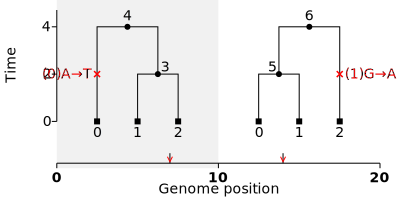

In [4]:
nodes = """\
is_sample time
1         0
1         0
1         0
0         2
0         4
0         2
0         4
"""

edges = """\
left right parent child
0    10    4      0,3
0    10    3      1,2
10   20    5      0,1
10   20    6      2,5
"""

sites = """\
position ancestral_state
7        A
14       G
"""

mutations = """\
site node parent derived_state
0    0    -1     T
1    2    -1     A
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case1.tree')
display.display(display.Markdown('## Case 1'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels
)

## Case 2

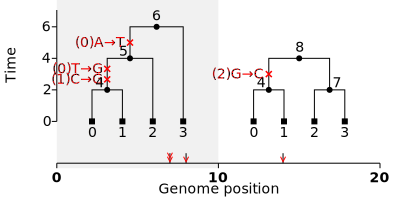

In [5]:
nodes = """\
is_sample time
1         0
1         0
1         0
1         0
0         2
0         4
0         6
0         2
0         4
"""

edges = """\
left right parent child
0    10    4      0,1
0    10    5      2,4
0    10    6      3,5
10   20    4      0,1
10   20    7      2,3
10   20    8      4,7
"""

sites = """\
position ancestral_state
7        A
8        C
14       G
"""

# # this is what's on disk
# mutations = """\
# site node parent derived_state
# 0    5    -1     T
# 1    4    -1     G
# 2    7    -1     C
# # """
# mutations = """\
# site node parent derived_state
# 0    5    -1     T
# 1    4    -1     G
# 2    4    -1     C
# """

mutations = """\
site node parent derived_state
0    5    -1     T
0    4    0      G
1    4    -1     G
2    4    -1     C
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case2.tree')
display.display(display.Markdown('## Case 2'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels
)

## Case 3

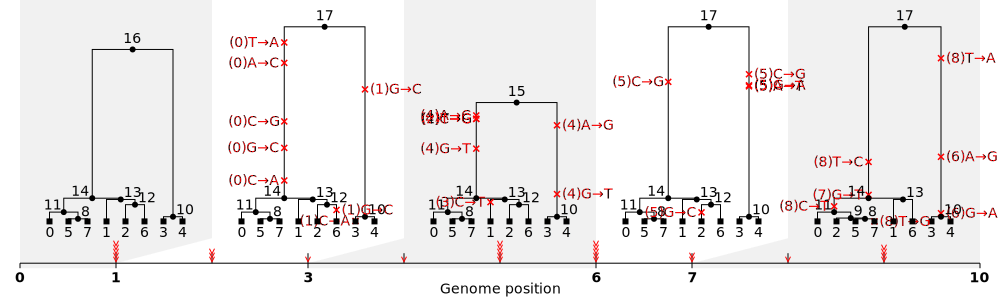

In [6]:
ts = msprime.sim_ancestry(samples=4, recombination_rate=0.2, sequence_length=10, random_seed=1)
ts = msprime.sim_mutations(ts, rate=.5, random_seed=1)
ts.dump(SAVE_PATH / 'case3.tree')
display.display(display.Markdown('## Case 3'))

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"
ts.draw_svg(size=(1000, 300), mutation_labels=mut_labels)

In [7]:
ts.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,14,2.61586948,A,-1,
1,0,14,2.31690679,C,0,
2,0,14,1.46151881,G,1,
3,0,14,1.07495111,C,2,
4,0,14,0.59790808,A,3,
5,1,10,1.93013317,C,-1,
6,1,6,0.16754089,C,-1,
7,1,3,0.00632015,A,5,
8,2,14,1.49923330,C,-1,
9,3,1,0.28165473,T,-1,


## Case 4

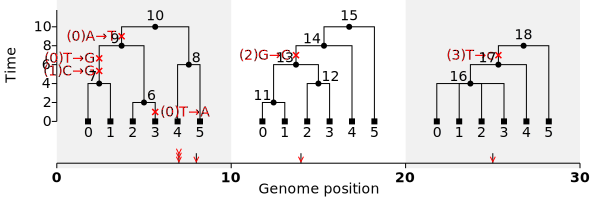

In [8]:
nodes = """\
is_sample time
1         0
1         0
1         0
1         0
1         0
1         0
0         2
0         4
0         6
0         8
0         10
0         2
0         4
0         6
0         8
0         10
0         4
0         6
0         8
"""

edges = """\
left right parent child
0    10    6      2,3
0    10    7      0,1
0    10    8      4,5
0    10    9      6,7
0    10    10     9,8
10   20    11     0,1
10   20    12     2,3
10   20    13     11,12
10   20    14     4,13
10   20    15     5,14
20   30    16     0,1,2,3
20   30    17     4,16
20   30    18     5,17
"""

sites = """\
position ancestral_state
7        A
8        C
14       G
25       T
"""

# TODO: should mut 2 on site 0 be child of mut 0 or mut 1 ?!?!?!?!?
mutations = """\
site node parent derived_state
0    9    -1     T
0    7    0      G
0    3    0      A
1    7    -1     G
2    13   -1     C
3    17   -1     c
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case4.tree')
display.display(display.Markdown('## Case 4'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels
)

## Case 5

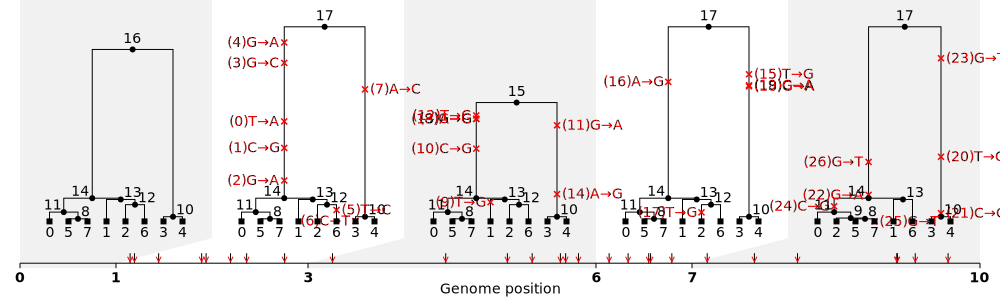

In [9]:
ts = msprime.sim_ancestry(samples=4, recombination_rate=0.2, sequence_length=10, random_seed=1)
ts = msprime.sim_mutations(ts, rate=.5, random_seed=1, discrete_genome=False)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case5.tree')
display.display(display.Markdown('## Case 5'))

ts.draw_svg(size=(1000, 300), mutation_labels=mut_labels)

In [10]:
ts.tables.mutations

id,site,node,time,derived_state,parent,metadata
0,0,14,1.46151881,A,-1,
1,1,14,1.07495111,G,-1,
2,2,14,0.59790808,A,-1,
3,3,14,2.31690679,C,-1,
4,4,14,2.61586948,A,-1,
5,5,6,0.16754089,C,-1,
6,6,3,0.00632015,T,-1,
7,7,10,1.93013317,C,-1,
8,8,14,1.49923330,C,-1,
9,9,1,0.28165473,G,-1,


## Case 6 (Correlated Biallelic)

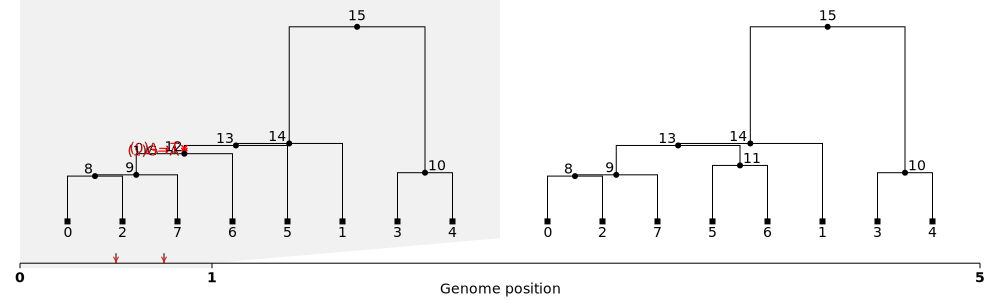

In [11]:
ts = msprime.sim_ancestry(samples=4, recombination_rate=0.01, sequence_length=5, random_seed=1)
# ts = msprime.sim_mutations(ts, rate=.5, random_seed=1, discrete_genome=False)

t = tskit.TableCollection.fromdict(ts.tables.asdict())
t.sites.add_row(.5, 'A')
t.sites.add_row(.75, 'G')
t.mutations.add_row(0, 12, 'T')
t.mutations.add_row(1, 12, 'A')
ts = t.tree_sequence()

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case6.tree')
display.display(display.Markdown('## Case 6 (Correlated Biallelic)'))
ts.draw_svg(
    # y_axis=True,
    mutation_labels=mut_labels,
    size=(1000, 300)
)

## Case 7 (Correlated)

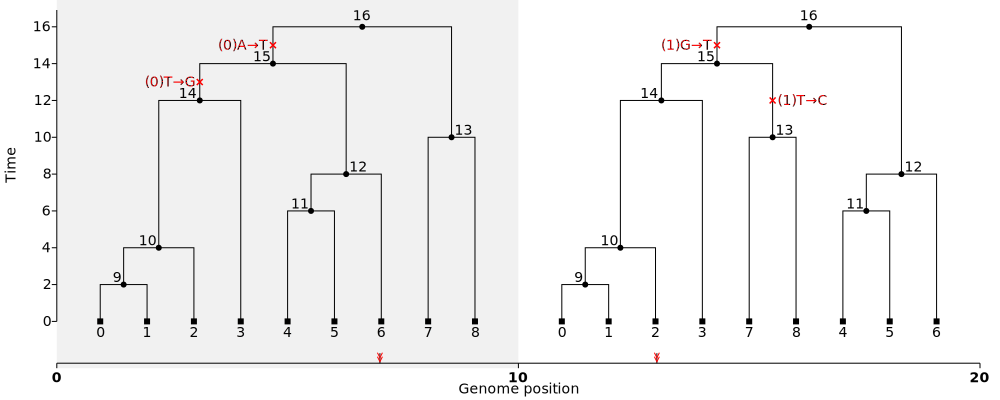

In [12]:
nodes = """\
id  is_sample time
0   1         0
1   1         0
2   1         0
3   1         0
4   1         0
5   1         0
6   1         0
7   1         0
8   1         0
9   0         2
10  0         4
11  0         6
12  0         8
13  0         10
14  0         12
15  0         14
16  0         16
"""

edges = """\
left  right parent child
0     20    9      0,1
0     20    10     2,9
0     20    11     4,5
0     20    12     6,11
0     20    13     7,8
0     20    14     3,10
0     10    15     12,14
0     10    16     13,15
10    20    15     13,14
10    20    16     12,15
"""

sites = """\
position ancestral_state
7        A
13       G
"""

mutations = """\
site node parent derived_state
0    15   -1     T
0    14    0     G
1    15   -1     T
1    13   2      C
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case7.tree')
display.display(display.Markdown('## Case 7 (Correlated)'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels,
    size=(1000, 400)
)

## Case 11 Strange Edge Case

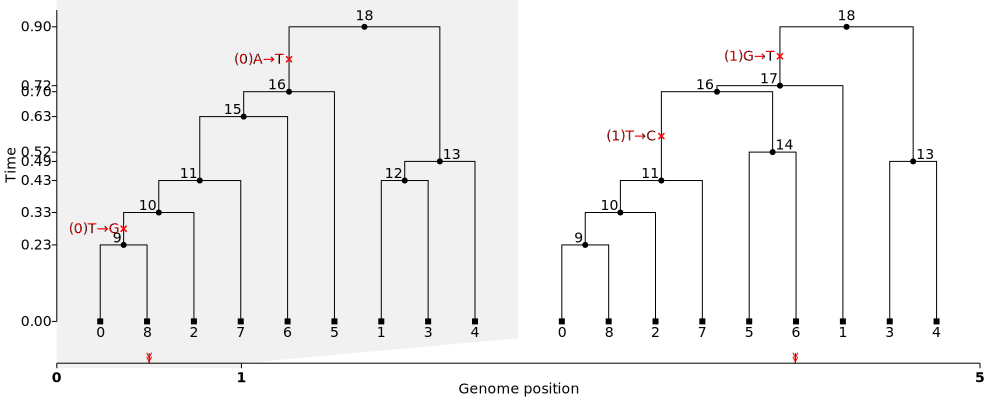

In [13]:
nodes = """\
id	is_sample	time
0	1	0.00000000
1	1	0.00000000
2	1	0.00000000
3	1	0.00000000
4	1	0.00000000
5	1	0.00000000
6	1	0.00000000
7	1	0.00000000
8	1	0.00000000
9	0	0.23410543
10	0	0.33333333
11	0	0.43122527
12	0	0.43122527
13	0	0.48983482
14	0	0.51824891
15	0	0.62691679
16	0	0.70315825
17	0	0.72167134
18	0	0.90185344
"""

edges = """\
left	right	parent	child
0	5	9	0
0	5	9	8
0	5	10	9
0	5	10	2
0	5	11	7
0	5	11	10
1	5	13	3
0	5	13	4
1	5	14	5
1	5	14	6
0	1	15	6
0	1	15	11
0	1	16	5
1	5	16	11
1	5	16	14
0	1	16	15
1	5	17	1
0	1	12	1
0	1	12	3
0	1	13	12
1	5	17	16
0	5	18	13
1	5	18	17
0	1	18	16
"""

sites = """\
position ancestral_state
0.5      A
4        G
"""

mutations = """\
site node parent derived_state
0    16   -1     T
0    9    0      G
1    17   -1     T
1    11   2      C
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}){prev}→{mut.derived_state}"

ts.dump(SAVE_PATH / 'case11.tree')
display.display(display.Markdown('## Case 11 Strange Edge Case'))
ts.draw_svg(
    y_axis=True,
    mutation_labels=mut_labels,
    size=(1000, 400)
)